## Mission Hospital - Package Pricing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import statsmodels.api as smf
from statsmodels.tools.eval_measures import rmse

### Loading the dataset

In [2]:
mission_df = pd.read_csv( "hospital.csv" )

In [3]:
mission_df.head( 5 )

,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,...,TYPE_OF_ADMSN,TOTAL_COST_TO_HOSPITAL,TOTAL_AMOUNT_BILLED_TO_THE_PATIENT,CONCESSION,ACTUAL_RECEIVABLE_AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_,COST_OF_IMPLANT
0,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,32,...,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
1,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,28,...,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
2,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,20,...,ELECTIVE,362231.0,390000,30000,360000,18,9,9,N,0
3,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,24,...,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
4,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,18,...,EMERGENCY,444876.0,254673,10000,244673,24,12,12,N,0


In [4]:
mission_df.columns

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_AMOUNT_BILLED_TO_THE_PATIENT',
       'CONCESSION', 'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT'],
      dtype='object')

In [5]:
mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 248 non-null    float64
 1   GENDER                              248 non-null    object 
 2   MARITAL_STATUS                      248 non-null    object 
 3   KEY_COMPLAINTS_CODE                 212 non-null    object 
 4   BODY_WEIGHT                         248 non-null    int64  
 5   BODY_HEIGHT                         248 non-null    int64  
 6   HR_PULSE                            248 non-null    int64  
 7   BP_HIGH                             225 non-null    float64
 8   BP_LOW                              225 non-null    float64
 9   RR                                  248 non-null    int64  
 10  PAST_MEDICAL_HISTORY_CODE           75 non-null     object 
 11  HB                                  246 non-n

## Exploratory Data Analysis

### Distribution of Total Amount billed to patient

<Axes: xlabel='TOTAL_COST_TO_HOSPITAL', ylabel='Density'>

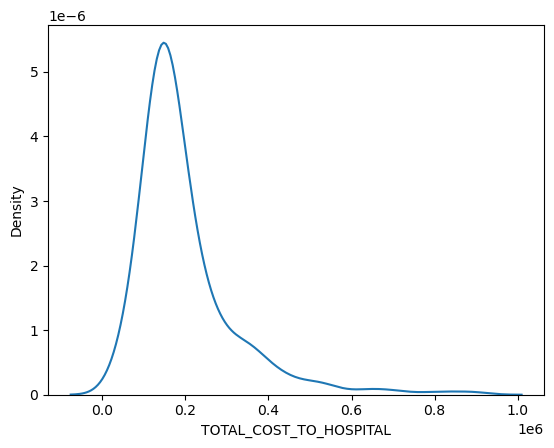

In [6]:
sn.kdeplot( mission_df.TOTAL_COST_TO_HOSPITAL )

In [7]:
from scipy import stats

In [8]:
cost_iqr = stats.iqr( mission_df.TOTAL_COST_TO_HOSPITAL )

In [9]:
cost_75_percentile = mission_df.TOTAL_COST_TO_HOSPITAL.quantile( 0.75 )

In [10]:
outliers_costs = cost_75_percentile + 3.0 * cost_iqr

In [11]:
outliers_costs

487497.75

In [12]:
mission_df = mission_df[mission_df.TOTAL_COST_TO_HOSPITAL < outliers_costs]

### Length of stay

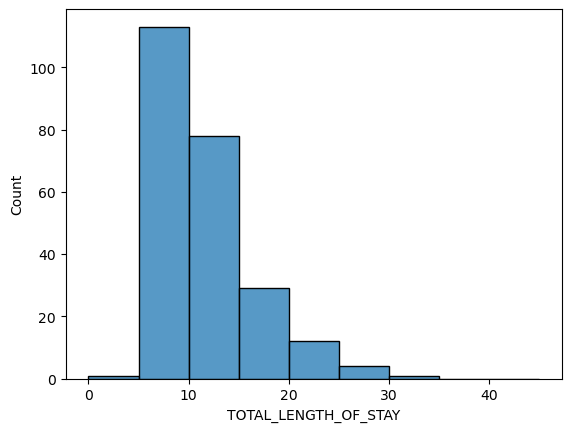

In [13]:
sn.histplot( mission_df.TOTAL_LENGTH_OF_STAY, bins = range(0, 50, 5));

### Find distribution of following parameters

### Correlation between *Age* and *Amount Billed*

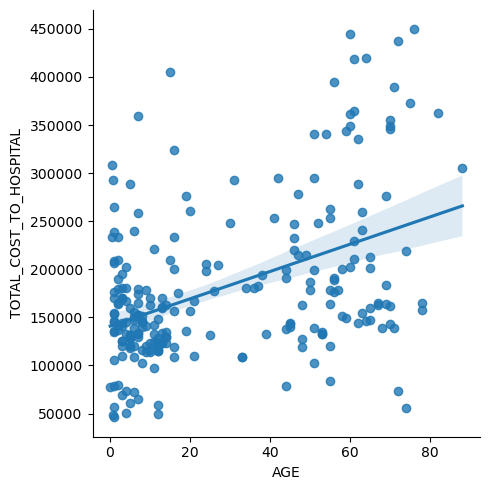

In [14]:
sn.lmplot( x = 'AGE', y = 'TOTAL_COST_TO_HOSPITAL', data = mission_df )

In [15]:
all_features = ['AGE', 'GENDER', 'MARITAL_STATUS', 
                'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
                'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
                'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 
                'CREATININE',
                'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 
                'TYPE_OF_ADMSN']

In [16]:
continuous_features = ['AGE','BODY_WEIGHT', 'BODY_HEIGHT', 
                       'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR', 
                       'HB','UREA', 'CREATININE']

In [17]:
categorical_features = list( set( all_features ) - set( continuous_features ) )

In [18]:
categorical_features

['GENDER',
 'STATE_AT_THE_TIME_OF_ARRIVAL',
 'PAST_MEDICAL_HISTORY_CODE',
 'MODE_OF_ARRIVAL',
 'MARITAL_STATUS',
 'TYPE_OF_ADMSN',
 'KEY_COMPLAINTS_CODE']

## Pairplot with all continuous features

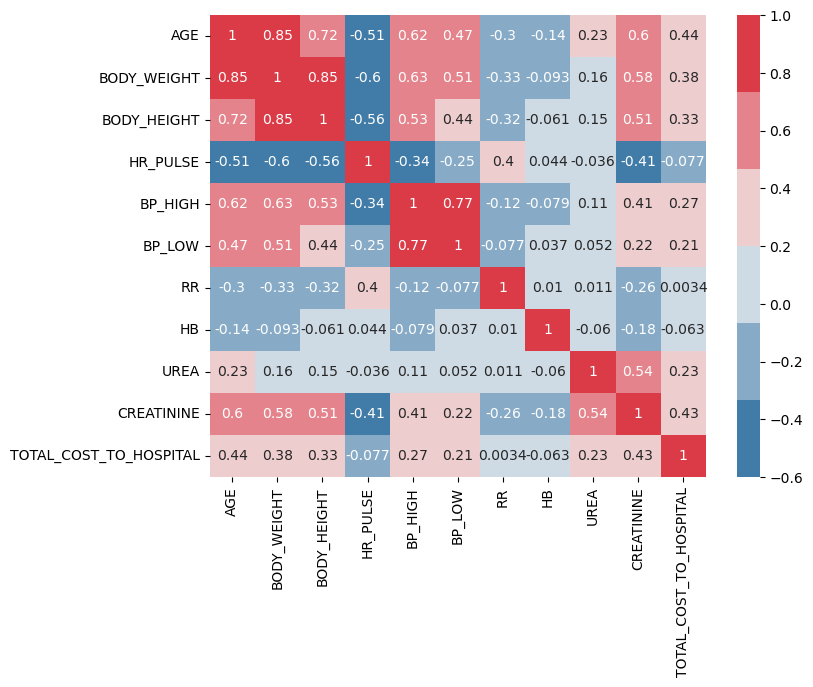

In [19]:
plt.figure( figsize = (8,6) )
sn.heatmap( mission_df[continuous_features 
                       + ['TOTAL_COST_TO_HOSPITAL']].corr()
           , annot = True
           , cmap = sn.diverging_palette(240, 10));

### Highly Correlated Variables

- BODY_HEIGHT and BODY_WEIGHT seem to be highly correlated. We can remove one of them.
- Or introduce a new variable called BMI = BODY_WEIGHT / BODY_HEIGHT

In [20]:
continuous_features.remove('BODY_WEIGHT')
continuous_features.remove('BP_HIGH')

### Distribution of total cost for different medical history

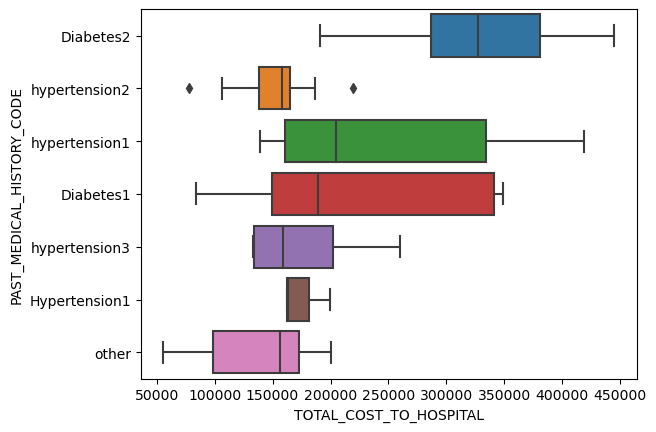

In [21]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE', 
           x = 'TOTAL_COST_TO_HOSPITAL', 
           data = mission_df );

### Distribution Plot for MODE_OF_ARRIVAL

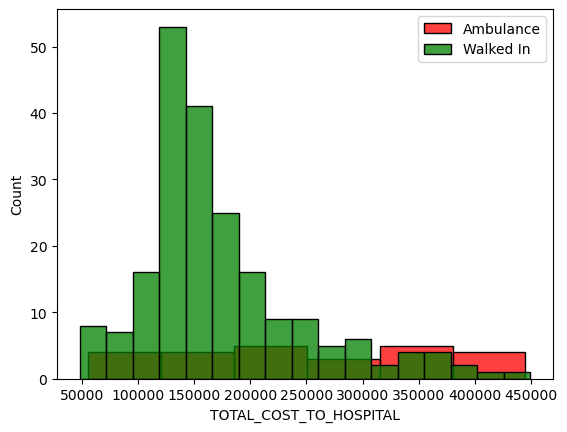

In [22]:
sn.histplot( mission_df[mission_df.MODE_OF_ARRIVAL == 'AMBULANCE']
            ['TOTAL_COST_TO_HOSPITAL'], 
            color = 'r', label = 'Ambulance')
sn.histplot( mission_df[mission_df.MODE_OF_ARRIVAL == 'WALKED IN']
            ['TOTAL_COST_TO_HOSPITAL'],
            color = 'g', label = 'Walked In')
plt.legend();

### Imputing missing past medical history to None

In [23]:
mission_final_df = mission_df.copy()

In [24]:
mission_final_df['PAST_MEDICAL_HISTORY_CODE'] = (mission_final_df
                                                 ['PAST_MEDICAL_HISTORY_CODE']
                                                 .fillna( 'None' ))

<Axes: xlabel='TOTAL_COST_TO_HOSPITAL', ylabel='PAST_MEDICAL_HISTORY_CODE'>

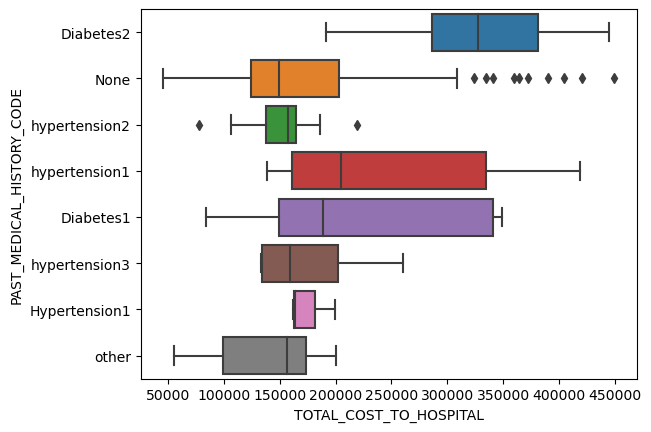

In [25]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE',
           x = 'TOTAL_COST_TO_HOSPITAL', 
           data = mission_final_df )

### *Mean* Imputation for other features

In [26]:
mission_final_df["BP_HIGH"].fillna(mission_final_df["BP_HIGH"].mean(), inplace=True)
mission_final_df["BP_LOW"].fillna(mission_final_df["BP_LOW"].mean(), inplace=True)
mission_final_df["HB"].fillna(mission_final_df["HB"].mean(), inplace=True)
mission_final_df["UREA"].fillna(mission_final_df["UREA"].mean(), inplace=True)
mission_final_df["CREATININE"].fillna(mission_final_df["CREATININE"].mean(), inplace=True)

### Any more null values

In [27]:
mission_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 2 to 247
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 238 non-null    float64
 1   GENDER                              238 non-null    object 
 2   MARITAL_STATUS                      238 non-null    object 
 3   KEY_COMPLAINTS_CODE                 202 non-null    object 
 4   BODY_WEIGHT                         238 non-null    int64  
 5   BODY_HEIGHT                         238 non-null    int64  
 6   HR_PULSE                            238 non-null    int64  
 7   BP_HIGH                             238 non-null    float64
 8   BP_LOW                              238 non-null    float64
 9   RR                                  238 non-null    int64  
 10  PAST_MEDICAL_HISTORY_CODE           238 non-null    object 
 11  HB                                  238 non-n

In [28]:
mission_final_df['KEY_COMPLAINTS_CODE'].value_counts()

other- heart          52
RHD                   25
CAD-TVD               23
CAD-DVD               22
ACHD                  19
other-tertalogy       18
other- respiratory    15
OS-ASD                15
PM-VSD                 6
other-nervous          3
CAD-SVD                2
CAD-VSD                1
other-general          1
Name: KEY_COMPLAINTS_CODE, dtype: int64

In [29]:
mission_final_df['KEY_COMPLAINTS_CODE'] = (mission_final_df['KEY_COMPLAINTS_CODE']
                                           .fillna( 'other-general' ))

In [30]:
mission_final_df = mission_final_df.dropna()

In [31]:
len( mission_final_df )

238

# Building Linear Regression Model

## Convert Categorical Features to Dummy Variables

In [32]:
mission_final_df

,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,...,TYPE_OF_ADMSN,TOTAL_COST_TO_HOSPITAL,TOTAL_AMOUNT_BILLED_TO_THE_PATIENT,CONCESSION,ACTUAL_RECEIVABLE_AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_,COST_OF_IMPLANT
2,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,20,...,ELECTIVE,362231.00,390000,30000,360000,18,9,9,N,0
4,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,18,...,EMERGENCY,444876.00,254673,10000,244673,24,12,12,N,0
5,75.0,M,MARRIED,CAD-DVD,45,140,130,215.0,140.0,42,...,EMERGENCY,372357.00,499987,0,499987,31,9,22,N,0
7,71.0,M,MARRIED,CAD-TVD,44,164,60,130.0,90.0,22,...,EMERGENCY,389827.00,248580,0,248580,24,11,13,N,0
8,72.0,M,MARRIED,CAD-DVD,72,174,95,100.0,50.0,25,...,EMERGENCY,437529.07,691297,0,691297,26,9,17,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,M,MARRIED,other- heart,69,176,62,130.0,90.0,24,...,ELECTIVE,295155.00,197000,0,197000,10,3,7,Y,35000
244,58.0,M,MARRIED,CAD-TVD,57,159,58,100.0,70.0,24,...,ELECTIVE,200321.00,220000,0,220000,11,2,9,Y,26000
245,44.0,M,MARRIED,CAD-TVD,58,159,68,150.0,90.0,24,...,ELECTIVE,191188.00,150000,10000,140000,13,5,8,N,0
246,60.0,M,MARRIED,other- heart,65,165,98,100.0,60.0,17,...,EMERGENCY,202807.00,229920,10000,219920,9,6,3,N,0


In [33]:
encoded_mission_final_df = pd.get_dummies(mission_final_df[continuous_features+categorical_features], 
                                          columns = categorical_features,
                                          drop_first = True )

In [34]:
encoded_mission_final_df[0:5]

,AGE,BODY_HEIGHT,HR_PULSE,BP_LOW,RR,HB,UREA,CREATININE,GENDER_M,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,...,KEY_COMPLAINTS_CODE_CAD-TVD,KEY_COMPLAINTS_CODE_CAD-VSD,KEY_COMPLAINTS_CODE_OS-ASD,KEY_COMPLAINTS_CODE_PM-VSD,KEY_COMPLAINTS_CODE_RHD,KEY_COMPLAINTS_CODE_other- heart,KEY_COMPLAINTS_CODE_other- respiratory,KEY_COMPLAINTS_CODE_other-general,KEY_COMPLAINTS_CODE_other-nervous,KEY_COMPLAINTS_CODE_other-tertalogy
2,82.0,164,100,80.0,20,12.0,15.0,0.8,1,0,...,1,0,0,0,0,0,0,0,0,0
4,60.0,175,72,100.0,18,10.0,48.0,1.9,1,0,...,0,0,0,0,0,0,0,0,0,0
5,75.0,140,130,140.0,42,12.0,29.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,71.0,164,60,90.0,22,10.0,37.0,1.5,1,0,...,1,0,0,0,0,0,0,0,0,0
8,72.0,174,95,50.0,25,10.0,32.0,1.2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
encoded_mission_final_df.columns

Index(['AGE', 'BODY_HEIGHT', 'HR_PULSE', 'BP_LOW', 'RR', 'HB', 'UREA',
       'CREATININE', 'GENDER_M', 'STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED',
       'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
       'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_None',
       'PAST_MEDICAL_HISTORY_CODE_hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_hypertension2',
       'PAST_MEDICAL_HISTORY_CODE_hypertension3',
       'PAST_MEDICAL_HISTORY_CODE_other', 'MODE_OF_ARRIVAL_TRANSFERRED',
       'MODE_OF_ARRIVAL_WALKED IN', 'MARITAL_STATUS_UNMARRIED',
       'TYPE_OF_ADMSN_EMERGENCY', 'KEY_COMPLAINTS_CODE_CAD-DVD',
       'KEY_COMPLAINTS_CODE_CAD-SVD', 'KEY_COMPLAINTS_CODE_CAD-TVD',
       'KEY_COMPLAINTS_CODE_CAD-VSD', 'KEY_COMPLAINTS_CODE_OS-ASD',
       'KEY_COMPLAINTS_CODE_PM-VSD', 'KEY_COMPLAINTS_CODE_RHD',
       'KEY_COMPLAINTS_CODE_other- heart',
       'KEY_COMPLAINTS_CODE_other- respiratory',
       'KEY_COMPLAINTS_CODE_other-general',
       'KEY_COMPLAINTS_CODE_o

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

In [37]:
vif_factors = get_vif_factors(encoded_mission_final_df )
vif_factors

,column,vif
0,AGE,19.549039
1,BODY_HEIGHT,36.121793
2,HR_PULSE,36.589790
3,BP_LOW,33.401260
4,RR,47.869811
5,HB,23.828063
6,UREA,8.228331
7,CREATININE,15.363031
8,GENDER_M,3.717609
9,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,2.653784


In [38]:
high_vif_cols = list(vif_factors[vif_factors.vif > 10]['column'])

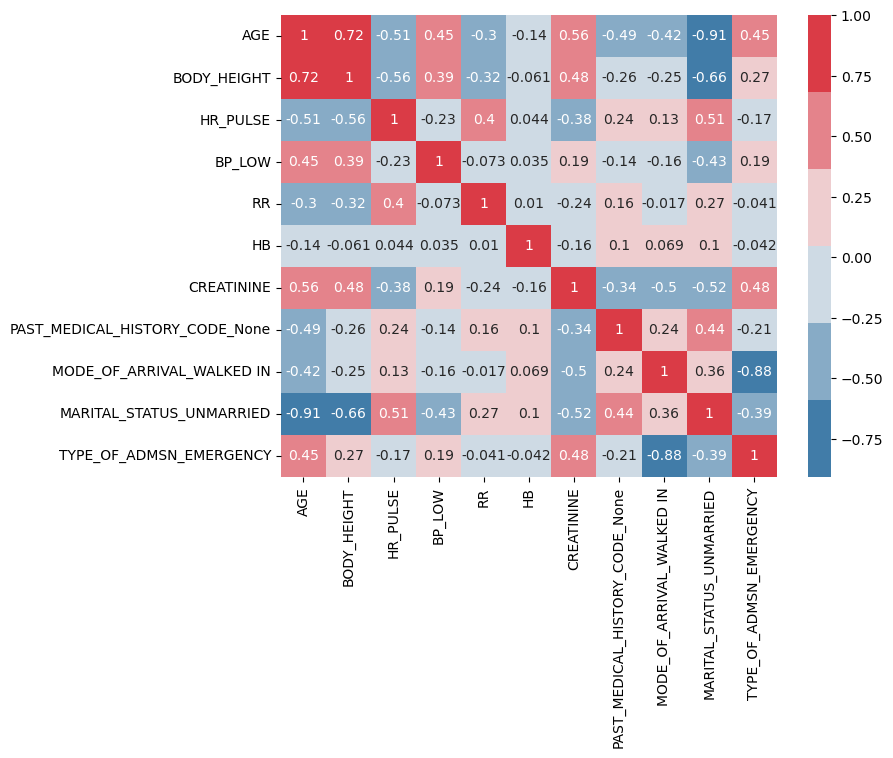

In [39]:
plt.figure( figsize = (8,6) )
sn.heatmap( encoded_mission_final_df[high_vif_cols].corr()
           , annot = True
           , cmap = sn.diverging_palette(240, 10));


In [88]:
columns_to_remove = ['MARITAL_STATUS_UNMARRIED', 'BODY_HIEGHT', 
                     'RR', 'HB', 'MODE_OF_ARRIVAL_WALKED IN',
                     'PAST_MEDICAL_HISTORY_CODE_None',
                     'BODY_HEIGHT', 'BP_LOW', 'CREATININE']

In [89]:
x_features = list(encoded_mission_final_df.columns)
x_features = list(set(x_features) - set(columns_to_remove))

In [90]:
vif_factors = get_vif_factors(encoded_mission_final_df[x_features] )
vif_factors

,column,vif
0,PAST_MEDICAL_HISTORY_CODE_hypertension2,1.269172
1,AGE,5.873341
2,PAST_MEDICAL_HISTORY_CODE_Hypertension1,1.145991
3,PAST_MEDICAL_HISTORY_CODE_other,1.194795
4,KEY_COMPLAINTS_CODE_other-tertalogy,1.815390
5,KEY_COMPLAINTS_CODE_CAD-DVD,2.802912
6,KEY_COMPLAINTS_CODE_CAD-VSD,1.057484
7,PAST_MEDICAL_HISTORY_CODE_hypertension3,1.153339
8,KEY_COMPLAINTS_CODE_OS-ASD,1.551165
9,KEY_COMPLAINTS_CODE_other- respiratory,1.790970


### Split the datasets into train and test datasets

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
Y = mission_final_df['TOTAL_COST_TO_HOSPITAL']
X = smf.add_constant( encoded_mission_final_df[x_features] )

In [93]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.7,
                                                    random_state = 20)

In [94]:
len( train_X )

166

In [95]:
len( test_y )

72

In [96]:
lin = smf.OLS( train_y, train_X )
lm = lin.fit()

In [97]:
lm.params

const                                      1.553381e+04
PAST_MEDICAL_HISTORY_CODE_hypertension2   -4.244600e+04
AGE                                        1.040074e+03
PAST_MEDICAL_HISTORY_CODE_Hypertension1   -1.155151e+04
PAST_MEDICAL_HISTORY_CODE_other           -4.532973e+04
KEY_COMPLAINTS_CODE_other-tertalogy        5.271263e+04
KEY_COMPLAINTS_CODE_CAD-DVD                7.061578e+04
KEY_COMPLAINTS_CODE_CAD-VSD               -1.856191e-10
PAST_MEDICAL_HISTORY_CODE_hypertension3    2.271907e+03
KEY_COMPLAINTS_CODE_OS-ASD                 1.317328e+04
KEY_COMPLAINTS_CODE_other- respiratory     4.502153e+04
KEY_COMPLAINTS_CODE_CAD-TVD                8.249683e+04
TYPE_OF_ADMSN_EMERGENCY                    1.240179e+04
KEY_COMPLAINTS_CODE_other- heart           4.703936e+04
KEY_COMPLAINTS_CODE_RHD                    1.096710e+05
KEY_COMPLAINTS_CODE_PM-VSD                 1.076607e+04
KEY_COMPLAINTS_CODE_CAD-SVD                8.265863e+04
HR_PULSE                                   8.736

In [98]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
======================================================================================================
Model:                         OLS                             Adj. R-squared:              0.379     
Dependent Variable:            TOTAL_COST_TO_HOSPITAL          AIC:                         4186.9591 
Date:                          2023-05-22 16:25                BIC:                         4264.7588 
No. Observations:              166                             Log-Likelihood:              -2068.5   
Df Model:                      24                              F-statistic:                 5.192     
Df Residuals:                  141                             Prob (F-statistic):          1.56e-10  
R-squared:                     0.469                           Scale:                       4.5884e+09
------------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------------------------
const                                    15533.8064 38165.2716  0.4070 0.6846  -59916.3208  90983.9335
PAST_MEDICAL_HISTORY_CODE_hypertension2 -42445.9981 24905.1764 -1.7043 0.0905  -91681.8256   6789.8295
AGE                                       1040.0738   336.4238  3.0916 0.0024     374.9869   1705.1606
PAST_MEDICAL_HISTORY_CODE_Hypertension1 -11551.5148 50309.9883 -0.2296 0.8187 -111010.9149  87907.8853
PAST_MEDICAL_HISTORY_CODE_other         -45329.7267 22933.0283 -1.9766 0.0500  -90666.7524      7.2990
KEY_COMPLAINTS_CODE_other-tertalogy      52712.6297 25962.3318  2.0304 0.0442    1386.8784 104038.3809
KEY_COMPLAINTS_CODE_CAD-DVD              70615.7835 29630.5845  2.3832 0.0185   12038.1479 129193.4191
KEY_COMPLAINTS_CODE_CAD-VSD                 -0.0000     0.0000 -1.3872 0.1676      -0.0000      0.0000
PAST_MEDICAL_HISTORY_CODE_hypertension3   2271.9068 42501.2315  0.0535 0.9574  -81750.1160  86293.9296
KEY_COMPLAINTS_CODE_OS-ASD               13173.2832 28337.0558  0.4649 0.6427  -42847.1347  69193.7011
KEY_COMPLAINTS_CODE_other- respiratory   45021.5307 27844.4066  1.6169 0.1081  -10024.9536 100068.0149
KEY_COMPLAINTS_CODE_CAD-TVD              82496.8279 31854.8535  2.5898 0.0106   19521.9650 145471.6908
TYPE_OF_ADMSN_EMERGENCY                  12401.7885 19937.2849  0.6220 0.5349  -27012.8578  51816.4347
KEY_COMPLAINTS_CODE_other- heart         47039.3628 21848.9826  2.1529 0.0330    3845.4211  90233.3046
KEY_COMPLAINTS_CODE_RHD                 109671.0321 26610.2101  4.1214 0.0001   57064.4698 162277.5943
KEY_COMPLAINTS_CODE_PM-VSD               10766.0716 39643.5842  0.2716 0.7863  -67606.5783  89138.7216
KEY_COMPLAINTS_CODE_CAD-SVD              82658.6337 58217.8524  1.4198 0.1579  -32434.0719 197751.3392
HR_PULSE                                   873.6709   315.1121  2.7726 0.0063     250.7159   1496.6259
PAST_MEDICAL_HISTORY_CODE_Diabetes2      69947.1261 32683.4096  2.1401 0.0341    5334.2645 134559.9877
PAST_MEDICAL_HISTORY_CODE_hypertension1  31209.1591 26333.7610  1.1851 0.2380  -20850.8822  83269.2005
STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED   122579.7711 77493.1897  1.5818 0.1159  -30618.9558 275778.4981
KEY_COMPLAINTS_CODE_other-nervous        29219.3881 51890.4668  0.5631 0.5743  -73364.5096 131803.2859
GENDER_M                                  5604.8150 12236.8422  0.4580 0.6476  -18586.5837  29796.2138
MODE_OF_ARRIVAL_TRANSFERRED              -6230.8866 37123.5373 -0.1678 0.8669  -79621.5765  67159.8033
UREA                                       175.2112   434.4481  0.4033 0.6873    -683.6630   1034.0853
KEY_COMPLAINTS_CODE_other-general         6247.2621 23877.5378  0.2616 0.7940  -40956.9942  53451.5184
-------------------------------------------------------------------------

In [99]:
lm.rsquared_adj

0.3787747350809155

## Find Significant Variables

In [100]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [101]:
significant_vars = get_significant_vars( lm )
significant_vars

['AGE',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'KEY_COMPLAINTS_CODE_other- heart',
 'KEY_COMPLAINTS_CODE_RHD',
 'HR_PULSE',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2']

## Building the model with significant variables

In [102]:
best_lreg = smf.OLS( train_y, train_X[significant_vars] )
best_lm = best_lreg.fit()

In [103]:
best_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                     OLS                       Adj. R-squared (uncentered):    0.880     
Dependent Variable:        TOTAL_COST_TO_HOSPITAL    AIC:                            4180.8498 
Date:                      2023-05-22 16:25          BIC:                            4205.7457 
No. Observations:          166                       Log-Likelihood:                 -2082.4   
Df Model:                  8                         F-statistic:                    153.7     
Df Residuals:              158                       Prob (F-statistic):             1.73e-70  
R-squared (uncentered):    0.886                     Scale:                          4.8438e+09
-----------------------------------------------------------------------------------------------
                                      Coef.     Std.Err.     t    P>|t|    [0.025      0.975]  
-----------------------------------------------------------------------------------------------
AGE                                  1429.7079   236.6646  6.0411 0.0000   962.2735   1897.1423
KEY_COMPLAINTS_CODE_other-tertalogy 36465.3443 20381.0116  1.7892 0.0755 -3789.0301  76719.7187
KEY_COMPLAINTS_CODE_CAD-DVD         53806.6501 21121.4569  2.5475 0.0118 12089.8281  95523.4722
KEY_COMPLAINTS_CODE_CAD-TVD         67509.1299 24842.0021  2.7175 0.0073 18443.8884 116574.3713
KEY_COMPLAINTS_CODE_other- heart    37005.5653 14049.4481  2.6340 0.0093  9256.6117  64754.5189
KEY_COMPLAINTS_CODE_RHD             96666.4752 20876.4940  4.6304 0.0000 55433.4774 137899.4730
HR_PULSE                             1141.1724    97.4266 11.7132 0.0000   948.7459   1333.5989
PAST_MEDICAL_HISTORY_CODE_Diabetes2 73717.0610 32255.4072  2.2854 0.0236 10009.6621 137424.4600
-----------------------------------------------------------------------------------------------
Omnibus:                        20.231                 Durbin-Watson:                    2.302 
Prob(Omnibus):                  0.000                  Jarque-Bera (JB):                 26.624
Skew:                           0.739                  Prob(JB):                         0.000 
Kurtosis:                       4.290                  Condition No.:                    664   
===============================================================================================

"""

In [104]:
predict_y = best_lm.predict( test_X[significant_vars] )

### Plot the residuals

In [105]:
residuals = test_y - predict_y

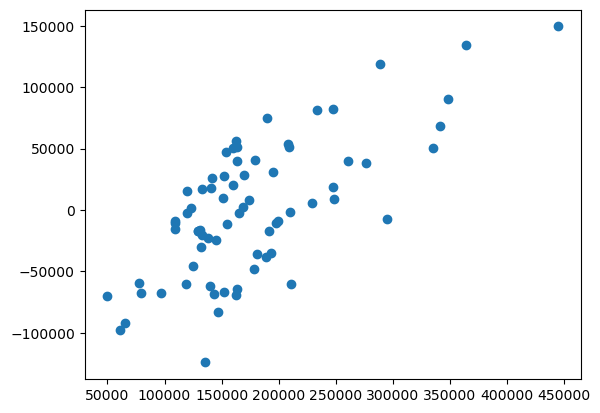

In [106]:
plt.scatter( y = residuals, x = test_y );

### Normality Test for residuals

In [112]:
stats.normaltest( residuals )

NormaltestResult(statistic=1.4764883177244295, pvalue=0.47795238765783554)

#### Note:

The pvalues is less than 0.05, which signifies that the residuals do not follow normal distribution. Null hypothesis is it follows normal distribution.

### PP Plot

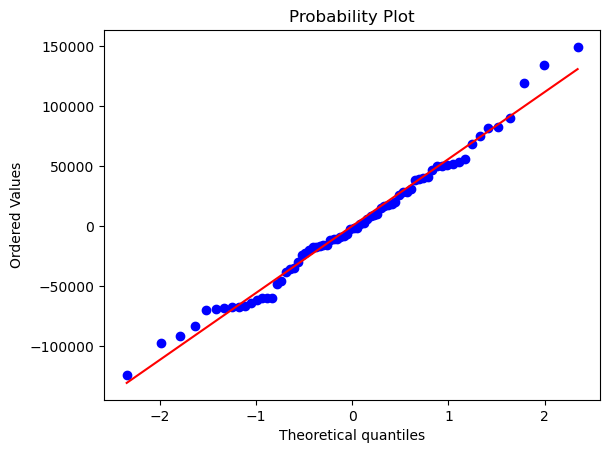

In [110]:
stats.probplot( residuals, dist="norm", plot=plt )
plt.show()

In [111]:
rmse( test_y, predict_y )

54815.256579351364